<h1 style="
    font-family: 'Arial', sans-serif;
    font-size: 2.5em;
    background: linear-gradient(90deg, #FF7F50, #1E90FF);
    -webkit-background-clip: text;
    -webkit-text-fill-color: transparent;
    text-align: center;
    text-shadow: 2px 2px 5px rgba(0, 0, 0, 0.3);
    margin-bottom: 20px;
    padding: 10px;
">
  Import Libraries
</h1>

In [105]:

# Data Manipulation
import pandas as pd        
import numpy as np         


# Data Visualization
import matplotlib.pyplot as plt  
import seaborn as sns            


# Model Selection and Metrics
from sklearn.model_selection import train_test_split  
from sklearn import metrics                           
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score 


# Preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder 


# Imbalanced Dataset Handling
from imblearn.under_sampling import RandomUnderSampler  


# Deep Learning (TensorFlow and Keras)
import tensorflow as tf                               
import tensorflow as tfr
# For converting labels to categorical (one-hot) format                              
from tensorflow.keras.utils import to_categorical     
from keras import layers      
# For using the Leaky ReLU activation function                        
from keras.layers import LeakyReLU                    
from tensorflow.keras.callbacks import EarlyStopping  


# Hyperparameter Tuning
import keras_tuner  
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
import keras
from keras import layers
from keras_tuner import RandomSearch
import keras_tuner
# PyTorch
#import torch  


# Feature Selection
from skfeature.function.similarity_based import fisher_score 
from sklearn.feature_selection import SelectKBest, chi2


# Dataset Creation and Resampling
from sklearn.utils import resample  
from sklearn.datasets import make_classification  



In [106]:
# Using GPU in PyTorch
# Check if CUDA is available and set the device
#device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#print("Using device:", device)

<h1 style="
    font-family: 'Arial', sans-serif;
    font-size: 2.5em;
    background: linear-gradient(90deg, #FF7F50, #1E90FF);
    -webkit-background-clip: text;
    -webkit-text-fill-color: transparent;
    text-align: center;
    text-shadow: 2px 2px 5px rgba(0, 0, 0, 0.3);
    margin-bottom: 20px;
    padding: 10px;
">
  Loading and Exploring the dataset
</h1>

In [107]:
#Load the dataset
df = pd.read_csv('star_classification.csv')

In [108]:

df.head(10)

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1237660961327743232.00,135.69,32.49,23.88,22.28,20.40,19.17,18.79,3606,301,2,79,6543777369295181824.00,GALAXY,0.63,5812,56354,171
1,1237664879951151104.00,144.83,31.27,24.78,22.83,22.58,21.17,21.61,4518,301,5,119,11760142036707334144.00,GALAXY,0.78,10445,58158,427
2,1237660961330430208.00,142.19,35.58,25.26,22.66,20.61,19.35,18.95,3606,301,2,120,5152200256025548800.00,GALAXY,0.64,4576,55592,299
3,1237663478724297984.00,338.74,-0.40,22.14,23.78,21.61,20.50,19.25,4192,301,3,214,10301071412954419200.00,GALAXY,0.93,9149,58039,775
4,1237680272041378048.00,345.28,21.18,19.44,17.58,16.50,15.98,15.54,8102,301,3,137,6891864880783316992.00,GALAXY,0.12,6121,56187,842
5,1237680272039609088.00,341.00,20.59,23.49,23.34,21.32,20.26,19.55,8102,301,3,110,5658976714552007680.00,QSO,1.42,5026,55855,741
6,1237678858481565952.00,23.23,11.42,21.47,21.18,20.93,20.61,20.43,7773,301,2,462,12462617271914000384.00,QSO,0.59,11069,58456,113
7,1237678858473963520.00,5.43,12.07,22.25,22.02,20.34,19.49,18.85,7773,301,2,346,6961443351364392960.00,GALAXY,0.48,6183,56210,15
8,1237661435386659840.00,200.29,47.20,24.40,22.36,20.61,19.46,18.96,3716,301,5,108,7459284627188110336.00,GALAXY,0.66,6625,56386,719
9,1237670961088167936.00,39.15,28.10,21.75,20.03,19.18,18.82,18.65,5934,301,4,122,2751763212482406400.00,STAR,-0.00,2444,54082,232


In [109]:
df.tail()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
99995,1237678879964201472.00,39.62,-2.59,22.17,22.98,21.90,21.31,20.74,7778,301,2,581,10554306253273999360.00,GALAXY,0.00,9374,57749,438
99996,1237679476408647936.00,29.49,19.80,22.69,22.39,20.45,19.76,19.42,7917,301,1,289,8586350850183813120.00,GALAXY,0.40,7626,56934,866
99997,1237668298220634368.00,224.59,15.70,21.17,19.27,18.20,17.69,17.35,5314,301,4,308,3112007759562827776.00,GALAXY,0.14,2764,54535,74
99998,1237661151383454208.00,212.27,46.66,25.35,21.64,19.91,19.07,18.62,3650,301,4,131,7601079570549462016.00,GALAXY,0.46,6751,56368,470
99999,1237661151378801152.00,196.90,49.46,22.62,21.80,20.60,20.01,19.28,3650,301,4,60,8343152349989327872.00,GALAXY,0.54,7410,57104,851


In [110]:
# Check for missing values
df.isnull().sum()

obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64

In [111]:
# Check the data types
df.dtypes


obj_ID         float64
alpha          float64
delta          float64
u              float64
g              float64
r              float64
i              float64
z              float64
run_ID           int64
rerun_ID         int64
cam_col          int64
field_ID         int64
spec_obj_ID    float64
class           object
redshift       float64
plate            int64
MJD              int64
fiber_ID         int64
dtype: object

In [112]:
# Check the duplicates

df.duplicated().sum()

0

In [113]:
# Check the statistical summary

df.describe()


,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00
mean,1237664721814903296.00,177.63,24.14,21.98,20.53,19.65,19.08,18.67,4481.37,301.00,3.51,186.13,5783882297552056320.00,0.58,5137.01,55588.65,449.31
std,8438559894562.57,96.50,19.64,31.77,31.75,1.85,1.76,31.73,1964.76,0.00,1.59,149.01,3324016169583858176.00,0.73,2952.30,1808.48,272.50
min,1237645942904389888.00,0.01,-18.79,-9999.00,-9999.00,9.82,9.47,-9999.00,109.00,301.00,1.00,11.00,299519089380976640.00,-0.01,266.00,51608.00,1.00
25%,1237659161195119360.00,127.52,5.15,20.35,18.97,18.14,17.73,17.46,3187.00,301.00,2.00,82.00,2844137590766986752.00,0.05,2526.00,54234.00,221.00
50%,1237663463144292864.00,180.90,23.65,22.18,21.10,20.13,19.41,19.00,4188.00,301.00,4.00,146.00,5614883135353542656.00,0.42,4987.00,55868.50,433.00
75%,1237668350286447104.00,233.90,39.90,23.69,22.12,21.04,20.40,19.92,5326.00,301.00,5.00,241.00,8332144107427485696.00,0.70,7400.25,56777.00,645.00
max,1237680531356386304.00,360.00,83.00,32.78,31.60,29.57,32.14,29.38,8162.00,301.00,6.00,989.00,14126940609093851136.00,7.01,12547.00,58932.00,1000.00


In [114]:
# Check the details of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

<h1 style="
    font-family: 'Arial', sans-serif;
    font-size: 2.5em;
    background: linear-gradient(90deg, #FF7F50, #1E90FF);
    -webkit-background-clip: text;
    -webkit-text-fill-color: transparent;
    text-align: center;
    text-shadow: 2px 2px 5px rgba(0, 0, 0, 0.3);
    margin-bottom: 20px;
    padding: 10px;
">
  Visualization of the dataset
</h1>

In [115]:
# Plotting histograms of numeric features to understand their distributions
numeric_features = ['alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'redshift']

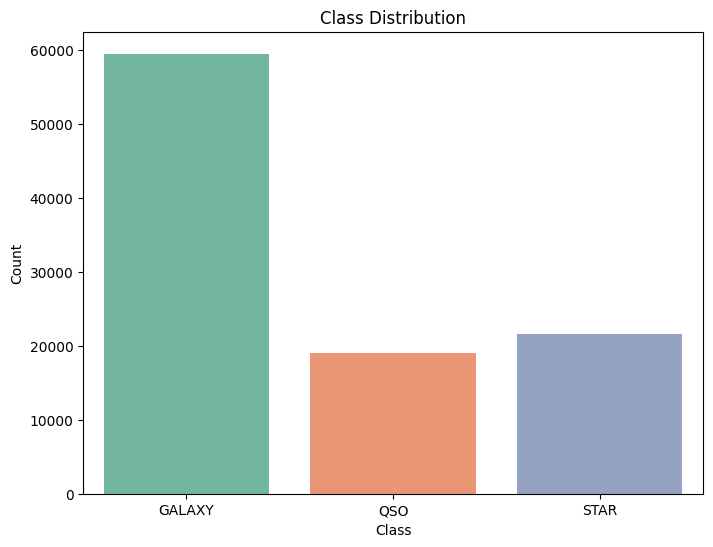

In [116]:
# Check the class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='class', data=df, hue='class', palette='Set2', legend=False)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


<div style="background-color:#f9f9f9; border-left: 6px solid #ff6b6b; padding: 10px;">
    <h3 style="color:#ff6b6b;">Personal Analysis</h3>
    <p style="font-size: 14px; color:#333;">As you can see, the target values (class) are imbalanced, which will affect the accuracy and performance of the model. Therefore, I will need to use a balancing method for the class values.</p>
</div>


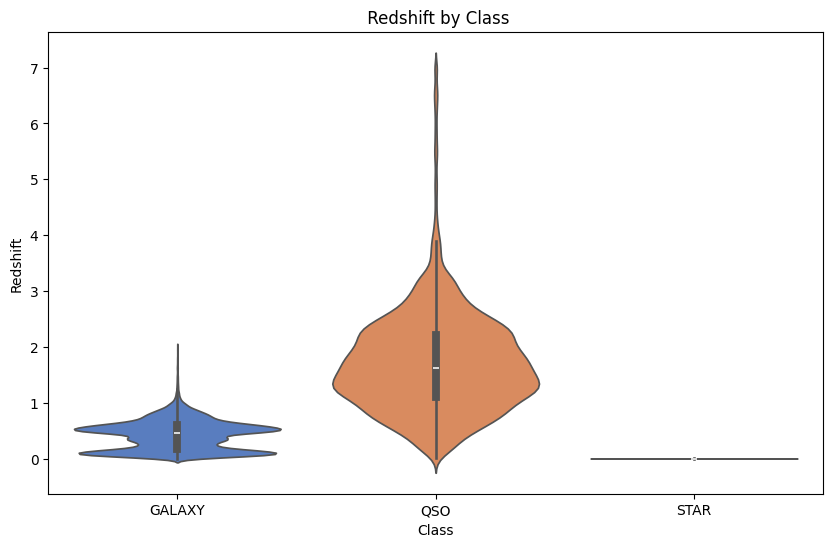

In [117]:
# Violin plots to show the distribution of 'redshift' across different classes
plt.figure(figsize=(10, 6))
sns.violinplot(x='class', y='redshift', data=df, palette='muted', hue='class')
plt.title(' Redshift by Class')
plt.xlabel('Class')
plt.ylabel('Redshift')
plt.show()

<div style="background-color:#f0f8ff; border-left: 6px solid #4682b4; padding: 10px;">
    <h3 style="color:#4682b4;">Personal Analysis</h3>
    <p style="font-size: 14px; color:#333;">This pattern aligns with my understanding of redshift in cosmology, where higher redshift values correspond to objects further away from Earth, with QSOs (Quasi-Stellar Objects) being some of the most distant observable objects in the universe.</p>
</div>


In [118]:
# Convert the 'class' column to numerical values with LabelEncoder
LE = LabelEncoder()
df['class'] = LE.fit_transform(df['class'])


In [119]:
# check value counts of the rerun_ID column
df['rerun_ID'].value_counts()

rerun_ID
301    100000
Name: count, dtype: int64

In [120]:
# since the rerun_ID has only 1 unique value, it's not useful for our analysis, so we can drop it.

df.drop('rerun_ID', axis=1, inplace=True)

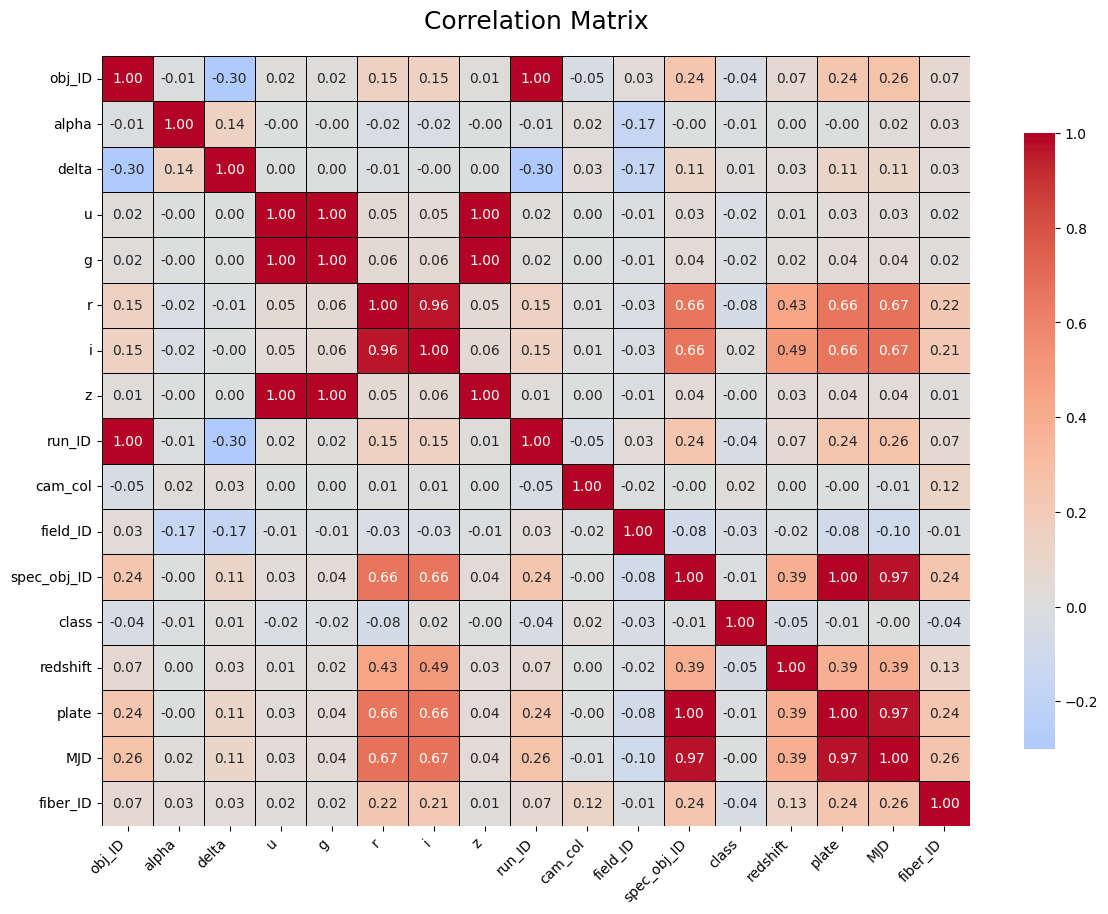

In [121]:
# Correlation Matrix Visualization
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0, linewidths=0.5, linecolor='black', fmt=".2f", cbar_kws={"shrink": 0.8})
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.title('Correlation Matrix', fontsize=18, pad=20)
plt.show()

<div style="background-color:#f0f8ff; border-left: 6px solid #4682b4; padding: 10px;">
    <h3 style="color:#4682b4;">Personal Analysis</h3>
    <p style="font-size: 14px; color:#333;">e r, i, z bands are highly correlated (0.96–1.00).</p>
    <p style="font-size: 14px; color:#333;">  Class weakly correlates with redshift (0.39) and moderately with spec_obj_ID (0.43), showing slight influence on these features, but minimal correlation with others.</p>
</div>


<h1 style="
    font-family: 'Arial', sans-serif;
    font-size: 2.5em;
    background: linear-gradient(90deg, #FF7F50, #1E90FF);
    -webkit-background-clip: text;
    -webkit-text-fill-color: transparent;
    text-align: center;
    text-shadow: 2px 2px 5px rgba(0, 0, 0, 0.3);
    margin-bottom: 20px;
    padding: 10px;
">
  Data Preprocessing
</h1>

In [122]:
df.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1237660961327743232.00,135.69,32.49,23.88,22.28,20.40,19.17,18.79,3606,2,79,6543777369295181824.00,0,0.63,5812,56354,171
1,1237664879951151104.00,144.83,31.27,24.78,22.83,22.58,21.17,21.61,4518,5,119,11760142036707334144.00,0,0.78,10445,58158,427
2,1237660961330430208.00,142.19,35.58,25.26,22.66,20.61,19.35,18.95,3606,2,120,5152200256025548800.00,0,0.64,4576,55592,299
3,1237663478724297984.00,338.74,-0.40,22.14,23.78,21.61,20.50,19.25,4192,3,214,10301071412954419200.00,0,0.93,9149,58039,775
4,1237680272041378048.00,345.28,21.18,19.44,17.58,16.50,15.98,15.54,8102,3,137,6891864880783316992.00,0,0.12,6121,56187,842


In [123]:
# Get the value counts of the 'class' column
df['class'].value_counts()


class
0    59445
2    21594
1    18961
Name: count, dtype: int64

In [124]:
# Find the minimum class count
min_class_count = df['class'].value_counts().min()

# Perform undersampling to match the minimum class size for each class
df = df.groupby('class').apply(lambda x: x.sample(min_class_count)).reset_index(drop=True)

# Check the class distribution after undersampling
df['class'].value_counts()

C:\Users\murta\AppData\Local\Temp\ipykernel_22320\256540686.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('class').apply(lambda x: x.sample(min_class_count)).reset_index(drop=True)


class
0    18961
1    18961
2    18961
Name: count, dtype: int64

In [125]:
# Create X and y
X = df.drop("class", axis = 1)
y= df["class"]

In [126]:
#le = LabelEncoder()
#y_enc = le.fit_transform(y)

# Converting the label into a matrix form
y = tf.keras.utils.to_categorical(y)

In [127]:
print("X_train shape:", X.shape)
print("y_train shape:", y.shape)

X_train shape: (56883, 16)
y_train shape: (56883, 3)


In [128]:
df.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1237651504343089408.00,202.69,-0.10,21.27,19.50,18.12,17.58,17.14,1404,3,25,335591322561832960.00,0,0.24,298,51955,266
1,1237667781748982016.00,155.82,19.24,20.80,18.71,17.63,17.13,16.75,5194,2,280,2672894138592028672.00,0,0.14,2374,53765,28
2,1237664854189670912.00,236.73,26.34,23.05,21.12,19.34,18.66,18.27,4512,5,246,4444186781387347968.00,0,0.39,3947,55332,945
3,1237678598633358080.00,13.81,3.67,22.95,22.43,22.45,21.29,20.87,7712,6,421,10615199687026999296.00,0,0.80,9428,58101,783
4,1237652948529840384.00,9.78,-9.19,19.69,18.34,17.56,17.12,16.82,1740,5,86,737581848120551424.00,0,0.16,655,52162,427


In [129]:
# Check the data types
df.dtypes

obj_ID         float64
alpha          float64
delta          float64
u              float64
g              float64
r              float64
i              float64
z              float64
run_ID           int64
cam_col          int64
field_ID         int64
spec_obj_ID    float64
class            int32
redshift       float64
plate            int64
MJD              int64
fiber_ID         int64
dtype: object

In [130]:

# Convert all continuous variables to integer,
# and convert all negative numbers to 0
X_cat = X.astype(int)
X_cat = X_cat.clip(lower=0)

# initialize chi2 and SelectKBest

chi_2_features = SelectKBest(chi2, k=len(X_cat.columns))

# fit our data to the SelectKBest
best_features = chi_2_features.fit(X_cat,y.astype(int))

# use decimal format in table print later
pd.options.display.float_format = '{:.2f}'.format

# wrap it up, and show the results
# the higher the score, the more effect that column has on price
df_features = pd.DataFrame(best_features.scores_)
df_columns = pd.DataFrame(X_cat.columns)
f_scores = pd.concat([df_columns,df_features],axis=1)
f_scores.columns = ['Features','Score']
f_scores.sort_values(by='Score',ascending=False)

,Features,Score
13,plate,13761211.35
14,MJD,427727.03
8,run_ID,195618.40
15,fiber_ID,137043.94
12,redshift,45376.89
10,field_ID,10561.88
2,delta,4700.12
7,z,2419.50
1,alpha,2151.07
6,i,2075.97


In [131]:
# According the table print, three columns are useless so,  I will drop them.
df = df.drop(["cam_col", "obj_ID", "spec_obj_ID"], axis=1)

In [132]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5)

In [133]:
# Save the categories into a list
categories = list(np.unique(df["class"]))
print(categories)

[0, 1, 2]


In [150]:

def build_model(hp):
    # iniatlize sequential test neural network
    model = keras.Sequential()
     # first layer, batch normalization + input shape, same as in typical neural network
    model.add(layers.BatchNormalization(input_shape=(len(X.columns),)),)
    # add the first actual layer including the regularizer
    model.add(
        layers.Dense(
            # Tune number of units separately.
            units=hp.Int(f"units_0", min_value=16, max_value=32, step=4),
            activation=hp.Choice("activation", ["relu"]),
            kernel_regularizer=keras.regularizers.l1(l1=0.1)
        )
    ) 

    # try additional layers, 1 or 2 extra layers
    for i in range(hp.Int("num_layers", 1, 2)):
        model.add(
            layers.Dense(
                # Tune number of units separately.
                units=hp.Int(f"units_{i + 1}", min_value=16, max_value=32, step=4),
                activation=hp.Choice("activation", ["relu"]),
            )
        )
    
    # add dropout

    model.add(layers.Dropout(hp.Float("dropout", min_value=0.3, max_value=0.5, step=0.1)))
    # output layer, only one node since this is regression
    model.add(layers.Dense(len(categories), activation="softmax"))

    # automate learning rate tests
    learning_rate = hp.Float("lr", min_value=1e-4, max_value=1e-2, sampling="log")

    # compile the test neural network
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
        loss='categorical_crossentropy', metrics=['accuracy']
    )

    return model


# build the model + use RandomSearch to actually search the best options for our neural network
build_model(keras_tuner.HyperParameters())

# use val_loss as the objective, because regression tasks do not have accuracy
tuner = keras_tuner.RandomSearch(
    hypermodel=build_model,
    objective="val_accuracy",
    max_trials=8,
    executions_per_trial=2,
    overwrite=True,
    directory="optimizations4",
    project_name="classification2test",
)
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)

# start searching
tuner.search(X_train, y_train, epochs=250, validation_data=(X_val, y_val), batch_size=256, callbacks=[early_stopping])

Trial 8 Complete [00h 00m 37s]
val_accuracy: 0.8981481492519379

Best val_accuracy So Far: 0.9055321216583252
Total elapsed time: 00h 04m 28s


In [135]:
# print out the result and suggestions
tuner.results_summary()

Results summary
Results in optimizations4\classification2test
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 5 summary
Hyperparameters:
units_0: 20
activation: relu
num_layers: 1
units_1: 20
dropout: 0.4
lr: 0.005000925581748794
units_2: 24
Score: 0.9137951135635376

Trial 7 summary
Hyperparameters:
units_0: 24
activation: relu
num_layers: 1
units_1: 20
dropout: 0.5
lr: 0.004751604638553115
units_2: 20
Score: 0.9099859297275543

Trial 0 summary
Hyperparameters:
units_0: 24
activation: relu
num_layers: 2
units_1: 28
dropout: 0.5
lr: 0.0007389625185877747
units_2: 16
Score: 0.9014299213886261

Trial 4 summary
Hyperparameters:
units_0: 20
activation: relu
num_layers: 1
units_1: 28
dropout: 0.5
lr: 0.00027524586095343357
units_2: 16
Score: 0.8932254910469055

Trial 2 summary
Hyperparameters:
units_0: 16
activation: relu
num_layers: 1
units_1: 16
dropout: 0.5
lr: 0.00013498122478935965
units_2: 16
Score: 0.8817393481731415

Trial 1 summary
Hyperparameters:
uni

In [136]:
# Get the top 2 models.
models = tuner.get_best_models(num_models=2)
best_model = models[0]
best_model.summary()

c:\Users\murta\OneDrive\Desktop\ML&DE\Third-semester\Deep_Learning\.venv\lib\site-packages\keras\src\layers\normalization\batch_normalization.py:143: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\murta\OneDrive\Desktop\ML&DE\Third-semester\Deep_Learning\.venv\lib\site-packages\keras\src\saving\saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization             │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 20)             │           340 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 20)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            63 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 887 (3.46 KB)

 Trainable params: 855 (3.34 KB)

 Non-trainable params: 32 (128.00 B)

<div style="background-color:#f9f9f9; border-left: 6px solid #ff6b6b; padding: 10px;">
    <h3 style="color:#ff6b6b;">Personal Analysis</h3>
    <p style="font-size: 14px; color:#333;">I used the hyperparameters from the Keras Tuner model, but they did not give me good results. So, I used a different structure and hyperparameters and got better results. Maybe I was not able to fully utilize the Keras Tuner.</p>
</div>


<h1 style="
    font-family: 'Arial', sans-serif;
    font-size: 2.5em;
    background: linear-gradient(90deg, #FF7F50, #1E90FF);
    -webkit-background-clip: text;
    -webkit-text-fill-color: transparent;
    text-align: center;
    text-shadow: 2px 2px 5px rgba(0, 0, 0, 0.3);
    margin-bottom: 20px;
    padding: 10px;
">
    Creating neural network structure
</h1>


In [137]:
from tensorflow.keras import layers, regularizers
model = keras.Sequential(
    [
        layers.BatchNormalization(input_shape=(len(X.columns),)),
        layers.Dense(20, activation=LeakyReLU(),  kernel_regularizer=regularizers.l2(0.01)),
         layers.Dropout(0.2),
        layers.Dense(32, activation=LeakyReLU(),  kernel_regularizer=regularizers.l2(0.01)),
        # add dropout
        layers.Dropout(0.5),
        layers.Dense(16, activation=LeakyReLU(),  kernel_regularizer=regularizers.l2(0.01)),
        layers.Dense(len(categories), activation="softmax")
    ]
)

# Compile the model
learning_rate = 0.009595273759688992
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Print the model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization_1           │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 20)             │           340 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │           672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,655 (6.46 KB)

 Trainable params: 1,623 (6.34 KB)

 Non-trainable params: 32 (128.00 B)

<div style="background-color:#eef9f1; border-left: 6px solid #8bc34a; padding: 10px;">
    <h3 style="color:#8bc34a;">Peronal Analysis</h3>
    <p style="font-size: 14px; color:#333;">I built the model with <strong>BatchNormalization</strong> to help it learn faster. For the hidden layers, I went to with  <strong>LeakyReLU</strong> in hiden layers because it handles negative values better than standard ReLU, which helped avoid dead neurons. I also added <strong>Dropout (0.5)<br></strong> to reduce overfitting, and the final layer uses <strong>softmax</strong> to predict 3 categories.</p>
    <p style="font-size: 14px; color:#333;">I played around with the structure and this setup worked better than what Keras Tuner suggested. With 1,623 trainable parameters, it's lightweight and works well for the size of my dataset.</p>
</div>


In [138]:
# Define EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',  
    patience=50,  
    restore_best_weights=True 
)

In [139]:


history = model.fit(
    X_train,
    y_train,
    epochs=600,  
    batch_size=126,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping] 
)


Epoch 1/600
317/317 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.7457 - loss: 0.8370 - val_accuracy: 0.3384 - val_loss: 108.4340
Epoch 2/600
317/317 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8589 - loss: 0.4990 - val_accuracy: 0.3384 - val_loss: 10.4724
Epoch 3/600
317/317 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8687 - loss: 0.4497 - val_accuracy: 0.9062 - val_loss: 0.3874
Epoch 4/600
317/317 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8987 - loss: 0.3787 - val_accuracy: 0.8917 - val_loss: 0.3779
Epoch 5/600
317/317 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8896 - loss: 0.3962 - val_accuracy: 0.8588 - val_loss: 0.4995
Epoch 6/600
317/317 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8866 - loss: 0.4157 - val_accuracy: 0.8605 - val_loss: 0.4756
Epoch 7/600
317/317 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8896 - loss: 0.3879 - val_accuracy: 0.8687 - val_loss: 0.3835
Epoch 8/600
317/317 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8956 - loss: 0.3795 - val_a

In [140]:
# save the model
model.save('classification_ann.keras')

<h1 style="
    font-family: 'Arial', sans-serif;
    font-size: 2.5em;
    background: linear-gradient(90deg, #FF7F50, #1E90FF);
    -webkit-background-clip: text;
    -webkit-text-fill-color: transparent;
    text-align: center;
    text-shadow: 2px 2px 5px rgba(0, 0, 0, 0.3);
    margin-bottom: 20px;
    padding: 10px;
">
    Training Metrics
</h1

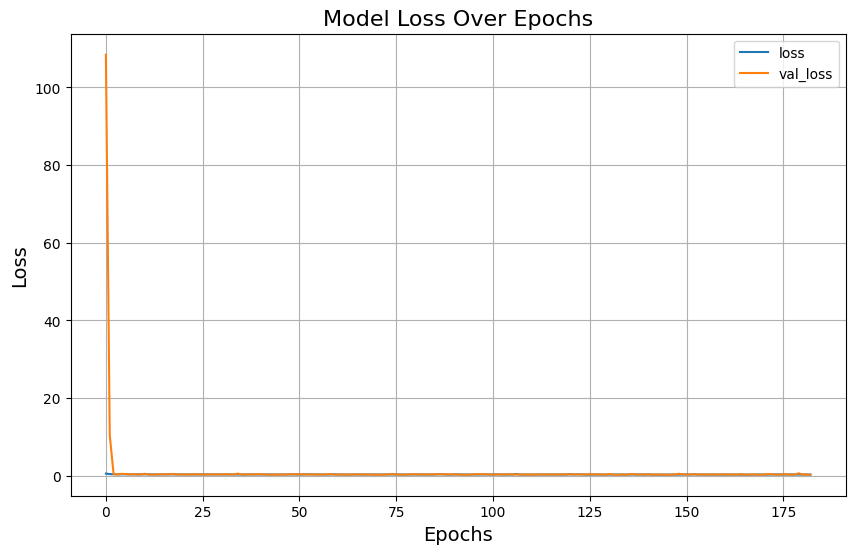

In [141]:
loss_df = pd.DataFrame(model.history.history)
# Create a larger figure
plt.figure(figsize=(10, 6))

# Plot the loss and validation loss
loss_df[['loss', 'val_loss']].plot(ax=plt.gca())

plt.title('Model Loss Over Epochs', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)
y
plt.grid(True)

plt.show()

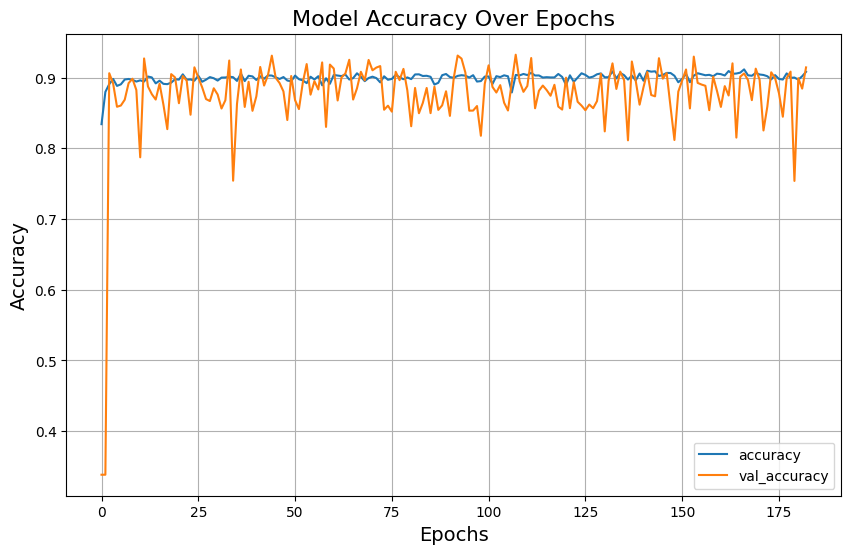

In [142]:
# Create a larger figure
plt.figure(figsize=(10, 6))

# Plot the accuracy and validation accuracy
loss_df[['accuracy', 'val_accuracy']].plot(ax=plt.gca())


plt.title('Model Accuracy Over Epochs', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)

plt.grid(True)

plt.show()

<div style="border: 2px solid #4CAF50; padding: 10px; background-color: #f9f9f9;">
    <p style="font-family: Arial, sans-serif; color: #333;">
        After trying out different ANN structures and tweaking hyperparameters again and again, I finally managed to get these results. Looking at the <strong style="color: #4CAF50;">Model Loss Over Epochs</strong>, it’s clear that the loss dropped fast and stayed low, which means the model learned pretty well. However, when I check the <strong style="color: #FF5733;">Model Accuracy Over Epochs</strong>, I can see that the validation accuracy fluctuates quite a bit, even though it generally hovers around 90%.
    </p>
    <p style="font-family: Arial, sans-serif; color: #333;">
        This might mean that my model is overfitting a little or just not generalizing as well as I’d like. It’s a decent result, but I feel like I still need to deepen my understanding to make an even better classification model with ANN.
    </p>
</div>


<h1 style="
    font-family: 'Arial', sans-serif;
    font-size: 2.5em;
    background: linear-gradient(90deg, #FF7F50, #1E90FF);
    -webkit-background-clip: text;
    -webkit-text-fill-color: transparent;
    text-align: center;
    text-shadow: 2px 2px 5px rgba(0, 0, 0, 0.3);
    margin-bottom: 20px;
    padding: 10px;
">
    Evaluation of the Model 
</h1

In [143]:
# compare the final model loss/accuracy/evaluation values
# the values should again match mostly
print("Test data evaluation:")
print(model.evaluate(X_test, y_test, verbose=0))
print("\nTrain data evaluation:")
print(model.evaluate(X_train, y_train, verbose=0))

Test data evaluation:
[0.29281437397003174, 0.9184343218803406]

Train data evaluation:
[0.2916543185710907, 0.919533908367157]


In [144]:
test_predictions = model.predict(X_test)
test_predictions = np.argmax(test_predictions, axis=1)

# convert also y-test -values with argmax
y_test = np.argmax(y_test, axis=1)

267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [145]:
print(type(y_test))
print(type(test_predictions))
print(y_test.shape)
print(test_predictions.shape)


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(8533,)
(8533,)


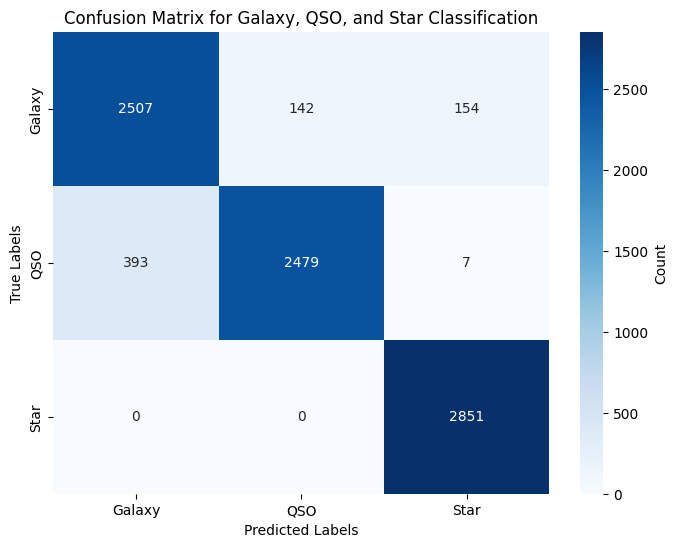

In [152]:
# Confusion matrix
# Define classes for axis labels
classes = ['Galaxy', 'QSO', 'Star']

plt.figure(figsize=(8, 6))


sns.heatmap(confusion_matrix(y_test, test_predictions), 
            annot=True, 
            fmt='g', 
            cmap='Blues',  
            xticklabels=classes, 
            yticklabels=classes,
            cbar_kws={'label': 'Count'}) 


plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Galaxy, QSO, and Star Classification')


plt.show()

<div style="border: 2px solid #3498db; padding: 10px; background-color: #f9f9f9;">
    <p style="font-family: Arial, sans-serif; color: #333;">
        Looking at this <strong style="color: #3498db;">confusion matrix</strong>, I can see the model is doing a pretty decent job, but there are a few areas to work on.
    </p>
    <p style="font-family: Arial, sans-serif; color: #333;">
        For <strong style="color: #2ecc71;">Galaxy</strong> predictions, the model got most of them right (2,507), but it mixed up 142 with QSO and 154 with Star. It’s not terrible, but it shows the model struggles a bit to differentiate between these classes.
    </p>
    <p style="font-family: Arial, sans-serif; color: #333;">
        The <strong style="color: #e67e22;">QSO</strong> class has a bit more confusion. While it got 2,479 correct, it misclassified 393 as Galaxies, which is quite a large number. At least it only confused 7 of them with Stars, so that's a positive.
    </p>
    <p style="font-family: Arial, sans-serif; color: #333;">
        On the bright side, <strong style="color: #f39c12;">Star</strong> predictions are nearly perfect. The model nailed all 2,851 with no mix-ups, which is reassuring.
    </p>
    <p style="font-family: Arial, sans-serif; color: #333;">
        So, while the model is working well overall, especially with Stars, it still has trouble distinguishing between Galaxies and QSOs. I think there's more I could do here,<br> like tweaking the hyperparameters or looking deeper into feature engineering to fix these issues.
    </p>
</div>


In [147]:
categories

[0, 1, 2]

In [148]:
# Convert categories to strings if they are integers
categories = [str(cat) for cat in categories]
# print the classification report based on true values and predictions
print(classification_report(y_test, test_predictions, target_names=categories))

# get overall accuracy of the model and print it
acc = accuracy_score(y_test, test_predictions)
print("\nModel overall accuracy: {:.2f}%".format(acc * 100))


              precision    recall  f1-score   support

           0       0.86      0.89      0.88      2803
           1       0.95      0.86      0.90      2879
           2       0.95      1.00      0.97      2851

    accuracy                           0.92      8533
   macro avg       0.92      0.92      0.92      8533
weighted avg       0.92      0.92      0.92      8533


Model overall accuracy: 91.84%


<div style="border: 2px solid #2ecc71; padding: 10px; background-color: #f9f9f9;">
    <p style="font-family: Arial, sans-serif; color: #333;">
        The results look pretty solid overall, with an <strong style="color: #2ecc71;">accuracy of 91.84%</strong>, which I’m happy with. Breaking it down by class:
    </p>
    <ul style="font-family: Arial, sans-serif; color: #333;">
        <li><strong style="color: #3498db;">Galaxy (Class 0):</strong> Precision is 0.86, recall is 0.89, and the F1-score is 0.88. The model is catching most of the Galaxies but missing a few here and there.</li>
        <li><strong style="color: #e67e22;">QSO (Class 1):</strong> Precision is strong at 0.95, but the recall is lower at 0.86, meaning I’m missing some QSOs. The F1-score of 0.90 is still decent though.</li>
        <li><strong style="color: #f39c12;">Star (Class 2):</strong> This is where the model shines, with recall at 1.00 and an F1-score of 0.97. It’s classifying Stars almost perfectly.</li>
    </ul>
    <p style="font-family: Arial, sans-serif; color: #333;">
        The macro and weighted averages are around 0.92, so the model is pretty consistent across the board. The <strong style="color: #2ecc71;">ROC-AUC score of 0.976</strong> also shows that it’s really good at distinguishing between the classes.
    </p>
    <p style="font-family: Arial, sans-serif; color: #333;">
        Overall, I think the model is doing a great job, especially with Stars, but I know there’s still room to improve with Galaxies and QSOs. With a bit more tweaking or fine-tuning, I’m confident I can boost those numbers even higher.
    </p>
</div>


In [149]:
# get ROC-AUC -score
roc_auc_score(y, model.predict(X), multi_class="ovr")
# 

1778/1778 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


0.976933654459336